In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

c:\Users\taher\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# get numerical columns
num_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
print(num_cols)

['age', 'bmi', 'children', 'charges']


In [5]:
scaled_data = MinMaxScaler().fit_transform(data[num_cols])
scaled_data = pd.DataFrame(scaled_data, columns=num_cols)

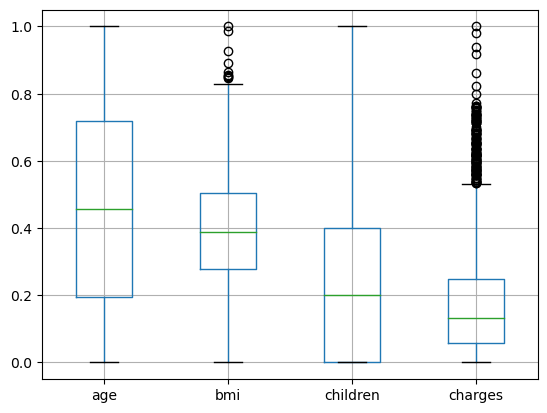

In [6]:
# boxplot scaled data
scaled_data.boxplot()
plt.show()

In [7]:
# Remove outlires in charges column based on boxplot quartiles 
Q1 = scaled_data['charges'].quantile(0.25)
Q3 = scaled_data['charges'].quantile(0.75)
IQR = Q3 - Q1
scaled_data_no_outliers = scaled_data[(scaled_data['charges'] >= Q1 - 1.5*IQR) & (scaled_data['charges'] <= Q3 + 1.5*IQR)]

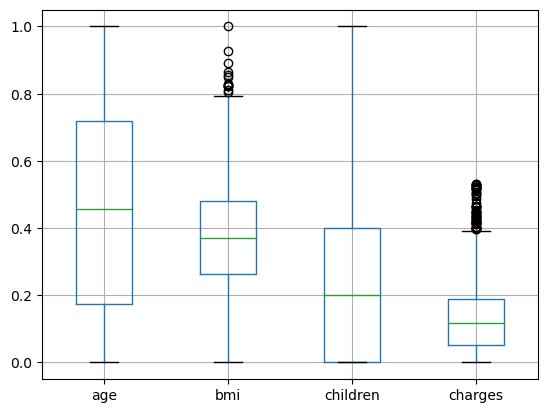

In [8]:
scaled_data_no_outliers.boxplot()
plt.show()

In [9]:
# remove outliers in charges columns over 0.2
scaled_data_no_outliers = scaled_data[scaled_data['charges'] <= 0.2]

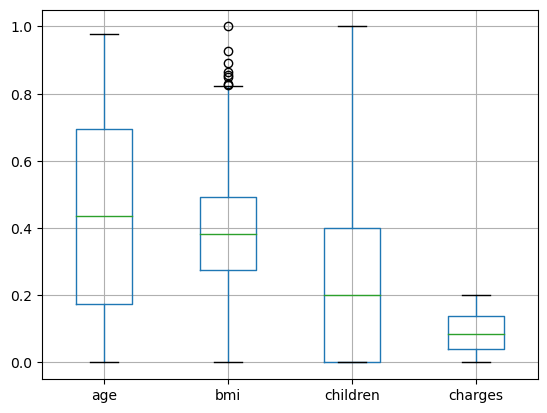

In [10]:
scaled_data_no_outliers.boxplot()
plt.show()

In [11]:
scaled_data_no_outliers

,age,bmi,children,charges
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
4,0.304348,0.347592,0.0,0.043816
5,0.282609,0.263115,0.0,0.042056
6,0.608696,0.470272,0.2,0.113629
...,...,...,...,...
1332,0.739130,0.773204,0.6,0.164247
1333,0.695652,0.403820,0.6,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108


In [12]:
scaled_data_no_outliers.index

Index([   1,    2,    4,    5,    6,    7,    8,   10,   12,   13,
       ...
       1326, 1327, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336],
      dtype='int64', length=934)

In [13]:
# original data without outliers
data_no_outliers = data.iloc[scaled_data_no_outliers.index]

In [14]:
data_no_outliers

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [15]:
final_data_no_outliers = pd.get_dummies(data_no_outliers)
final_scaled_data_no_outliers = pd.get_dummies(scaled_data_no_outliers)

In [16]:
final_data_no_outliers

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1,18,33.77,1,1725.5523,False,True,True,False,False,False,True,False
2,28,33.00,3,4449.4620,False,True,True,False,False,False,True,False
4,32,28.88,0,3866.8552,False,True,True,False,False,True,False,False
5,31,25.74,0,3756.6216,True,False,True,False,False,False,True,False
6,46,33.44,1,8240.5896,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,44.70,3,11411.6850,True,False,True,False,False,False,False,True
1333,50,30.97,3,10600.5483,False,True,True,False,False,True,False,False
1334,18,31.92,0,2205.9808,True,False,True,False,True,False,False,False
1335,18,36.85,0,1629.8335,True,False,True,False,False,False,True,False


In [17]:
X_scaled = final_scaled_data_no_outliers.drop(['bmi'], axis=1)
X = final_data_no_outliers.drop(['bmi'], axis=1)
y = final_data_no_outliers['bmi']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaled_x_train, scaled_x_test, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_scaled = LinearRegression()
lr_scaled.fit(scaled_x_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error
# R2 score and MSE for original data
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))

0.06207585353829481
35.972108759910604


In [21]:
# R2 score and MSE for scaled data
print(lr_scaled.score(scaled_x_test, y_test))
print(mean_squared_error(y_test, lr_scaled.predict(scaled_x_test)))

-0.004635090608589021
38.53066677057805


In [22]:
original_charges_upper_limit = data.iloc[scaled_data[scaled_data['charges'] <= 0.2].index]['charges'].max()
original_charges_upper_limit

13635.6379

In [23]:
scaled_data_mapped_outlires = scaled_data
scaled_data_mapped_outlires['charges'] = scaled_data_mapped_outlires['charges'].apply(lambda x: x if x < 0.2 else 0.2)

data_mapped_outlires = data
data_mapped_outlires['charges'] = data_mapped_outlires['charges'].apply(lambda x: x if x < original_charges_upper_limit else original_charges_upper_limit)

In [24]:
data_mapped_outlires

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,13635.6379
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.4620
3,33,male,22.705,0,no,northwest,13635.6379
4,32,male,28.880,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483
1334,18,female,31.920,0,no,northeast,2205.9808
1335,18,female,36.850,0,no,southeast,1629.8335
1336,21,female,25.800,0,no,southwest,2007.9450


In [25]:
final_data_mapped_outliers = pd.get_dummies(data_mapped_outlires)
final_scaled_data_mapped_outliers = pd.get_dummies(scaled_data_mapped_outlires)

In [26]:
X_scaled = final_scaled_data_mapped_outliers.drop(['bmi'], axis=1)
X = final_data_mapped_outliers.drop(['bmi'], axis=1)
y = final_data_mapped_outliers['bmi']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaled_x_train, scaled_x_test, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_scaled = LinearRegression()
lr_scaled.fit(scaled_x_train, y_train)

LinearRegression()

In [29]:
# R2 score and MSE for original data
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))

0.1166621902682986
35.00708516121057


In [30]:
# R2 score and MSE for scaled data
print(lr_scaled.score(scaled_x_test, y_test))
print(mean_squared_error(y_test, lr_scaled.predict(scaled_x_test)))

-0.005521658428913501
39.84928748691757


In [31]:
charges_median = data['charges'].median()
scaled_charges_median = scaled_data['charges'].median()

In [32]:
scaled_data_mapped_outlires = scaled_data
scaled_data_mapped_outlires['charges'] = scaled_data_mapped_outlires['charges'].apply(lambda x: x if x < 0.2 else scaled_charges_median)

data_mapped_outlires = data
data_mapped_outlires['charges'] = data_mapped_outlires['charges'].apply(lambda x: x if x < original_charges_upper_limit else charges_median)

final_data_mapped_outliers = pd.get_dummies(data_mapped_outlires)
final_scaled_data_mapped_outliers = pd.get_dummies(scaled_data_mapped_outlires)

X_scaled = final_scaled_data_mapped_outliers.drop(['bmi'], axis=1)
X = final_data_mapped_outliers.drop(['bmi'], axis=1)
y = final_data_mapped_outliers['bmi']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaled_x_train, scaled_x_test, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_scaled = LinearRegression()
lr_scaled.fit(scaled_x_train, y_train)

# R2 score and MSE for original data
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))

# R2 score and MSE for scaled data
print(lr_scaled.score(scaled_x_test, y_test))
print(mean_squared_error(y_test, lr_scaled.predict(scaled_x_test)))



0.11642669073471801
35.01641811643636
-0.006058589394930758
39.870566308955944


In [33]:
def squared(X):
    return X**2

In [34]:
data['charges_squared'] = data['charges'].apply(squared)
scaled_data['charges_squared'] = scaled_data['charges'].apply(squared)
data['age_squared'] = data['age'].apply(squared)
scaled_data['age_squared'] = scaled_data['age'].apply(squared)

In [35]:
data

,age,sex,bmi,children,smoker,region,charges,charges_squared,age_squared
0,19,female,27.900,0,yes,southwest,9382.0330,8.802254e+07,361
1,18,male,33.770,1,no,southeast,1725.5523,2.977531e+06,324
2,28,male,33.000,3,no,southeast,4449.4620,1.979771e+07,784
3,33,male,22.705,0,no,northwest,9382.0330,8.802254e+07,1089
4,32,male,28.880,0,no,northwest,3866.8552,1.495257e+07,1024
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483,1.123716e+08,2500
1334,18,female,31.920,0,no,northeast,2205.9808,4.866351e+06,324
1335,18,female,36.850,0,no,southeast,1629.8335,2.656357e+06,324
1336,21,female,25.800,0,no,southwest,2007.9450,4.031843e+06,441


In [36]:
final_data = pd.get_dummies(data)
final_scaled_data = pd.get_dummies(scaled_data)

X_scaled = final_scaled_data.drop(columns = ['bmi'])
X = final_data.drop(['bmi'], axis=1)
y = final_data['bmi']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaled_x_train, scaled_x_test, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_scaled = LinearRegression()
lr_scaled.fit(scaled_x_train, y_train)

# R2 score and MSE for original data
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))

# R2 score and MSE for scaled data
print(lr_scaled.score(scaled_x_test, y_test))
print(mean_squared_error(y_test, lr_scaled.predict(scaled_x_test)))



0.09437608437313916
35.89029382542541
-0.028412554157087655
40.75646425139454


In [37]:
final_data = pd.get_dummies(data)
final_scaled_data = pd.get_dummies(scaled_data)

X_scaled = final_scaled_data.drop(columns = ['bmi', 'charges', 'age'])
X = final_data.drop(columns = ['bmi', 'charges', 'age'])
y = final_data['bmi']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaled_x_train, scaled_x_test, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_scaled = LinearRegression()
lr_scaled.fit(scaled_x_train, y_train)

# R2 score and MSE for original data
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))

# R2 score and MSE for scaled data
print(lr_scaled.score(scaled_x_test, y_test))
print(mean_squared_error(y_test, lr_scaled.predict(scaled_x_test)))



0.11168967867736246
35.20414809094283
-0.015324517312219177
40.2377793096048


In [38]:
def cubic(x):
    return x**3

In [39]:
data['charges_cubic'] = data['charges'].apply(cubic)
scaled_data['charges_cubic'] = scaled_data['charges'].apply(cubic)
data['age_cubic'] = data['age'].apply(cubic)
scaled_data['age_cubic'] = scaled_data['age'].apply(cubic)

In [40]:
final_data = pd.get_dummies(data)
final_scaled_data = pd.get_dummies(scaled_data)

X_scaled = final_scaled_data.drop(columns = ['bmi', 'charges', 'age', 'charges_squared', 'age_squared'])
X = final_data.drop(columns = ['bmi', 'charges', 'age', 'charges_squared', 'age_squared'])
y = final_data['bmi']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaled_x_train, scaled_x_test, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_scaled = LinearRegression()
lr_scaled.fit(scaled_x_train, y_train)

# R2 score and MSE for original data
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))

# R2 score and MSE for scaled data
print(lr_scaled.score(scaled_x_test, y_test))
print(mean_squared_error(y_test, lr_scaled.predict(scaled_x_test)))



0.10703864384076789
35.3884707485022
-0.021437705713146293
40.48004778786996


In [41]:
final_data = pd.get_dummies(data)
final_scaled_data = pd.get_dummies(scaled_data)

X_scaled = final_scaled_data.drop(columns = ['bmi'])
X = final_data.drop(columns = ['bmi'])
y = final_data['bmi']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaled_x_train, scaled_x_test, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_scaled = LinearRegression()
lr_scaled.fit(scaled_x_train, y_train)

# R2 score and MSE for original data
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))

# R2 score and MSE for scaled data
print(lr_scaled.score(scaled_x_test, y_test))
print(mean_squared_error(y_test, lr_scaled.predict(scaled_x_test)))



0.09373333214689805
35.9157663928551
-0.027616175479463045
40.724903396780334


In [42]:
# trying sklearn polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X = final_data.drop(columns = ['bmi', 'charges_cubic', 'age_cubic', 'charges_squared', 'age_squared'])
X_poly = poly.fit_transform(X)
X_poly_scaled = poly.fit_transform(X_scaled)

In [43]:
y = final_data['bmi']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

# R2 score and MSE for original data
print(lr.score(x_test, y_test))
print(mean_squared_error(y_test, lr.predict(x_test)))

0.11642669073471801
35.01641811643636


In [44]:
data

,age,sex,bmi,children,smoker,region,charges,charges_squared,age_squared,charges_cubic,age_cubic
0,19,female,27.900,0,yes,southwest,9382.0330,8.802254e+07,361,8.258304e+11,6859
1,18,male,33.770,1,no,southeast,1725.5523,2.977531e+06,324,5.137885e+09,5832
2,28,male,33.000,3,no,southeast,4449.4620,1.979771e+07,784,8.808917e+10,21952
3,33,male,22.705,0,no,northwest,9382.0330,8.802254e+07,1089,8.258304e+11,35937
4,32,male,28.880,0,no,northwest,3866.8552,1.495257e+07,1024,5.781942e+10,32768
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483,1.123716e+08,2500,1.191201e+12,125000
1334,18,female,31.920,0,no,northeast,2205.9808,4.866351e+06,324,1.073508e+10,5832
1335,18,female,36.850,0,no,southeast,1629.8335,2.656357e+06,324,4.329420e+09,5832
1336,21,female,25.800,0,no,southwest,2007.9450,4.031843e+06,441,8.095719e+09,9261


In [47]:
squared(data)

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'